# CS 599D Data Science Study Report
## Week 3

This week I studied the chapter three. It introduces the package mayplotlib and some useful plots for data visualizaion. I applied the plotting techniques to the patient dataset and visualized the gender distribution among patients and the age distirbution group by gender. Besides, I examined other several datasets and checked their basic information.

### The first cell extracts all the 31 datasets.

In [2]:
# Built-in modules
import re

# Third-party modules
from bs4 import BeautifulSoup
import pandas as pd
import requests
from requests.auth import HTTPBasicAuth

WEB_LINK = 'https://physionet.org/works/eICUCollaborativeResearchDatabase/files/'
USERNAME = 'jh26@hood.edu'
PASSWORD = '201661Emma!'

def auth_get(url, stream=False):
    return requests.get(url, auth=HTTPBasicAuth(USERNAME, PASSWORD), stream=stream)

def get_links_from_webpage():
    # Parses links from HTML
    resp = auth_get(WEB_LINK)
    soup = BeautifulSoup(resp.text, "html.parser")

    # Gets list of links
    links = []
    for link in soup.find_all('a', text=re.compile('gz')):
        links.append(WEB_LINK + link['href'])

    return links

def extract_data(file_link):
    resp = auth_get(file_link, stream=True)
    return pd.read_csv(resp.raw, compression='gzip', error_bad_lines=False)


Refer to the link below for the introduction of each dataset and their mega data.

__[Introduction to the Datasets](https://eicu-crd.mit.edu/eicutables/admissiondrug/)__

### This cell extract the dataset of admissionDrug.csv.gz

Purpose: admissionDrug contains details of medications that a patient was taking prior to admission to the ICU. This table includes admission drug information for a patient such as the drug name, dosage, timeframe during which the drug was administered, the user type and specialty of the clinician entering the data, and the note type where the information was entered.

In [7]:
import numpy as np
# fill the missing values with na 
adDrug_df.replace(r" ", np.NaN, inplace=True)
adDrug_df["drugdosage"].replace(0, np.NaN, inplace=True)
print(adDrug_df.head())
print(adDrug_df.shape)

   admissiondrugid  patientunitstayid  drugoffset  drugenteredoffset  \
0          1589228             242954          64                 79   
1          2063596             243285          29                 39   
2          2063595             243285          29                 39   
3          2063590             243285          29                 39   
4          2063594             243285          29                 39   

  drugnotetype specialtytype   usertype  rxincluded  writtenineicu  \
0    Admission   eCM Primary  THC Nurse        True           True   
1    Admission   eCM Primary  THC Nurse       False           True   
2    Admission   eCM Primary  THC Nurse       False           True   
3    Admission   eCM Primary  THC Nurse       False           True   
4    Admission   eCM Primary  THC Nurse       False           True   

                                            drugname  drugdosage drugunit  \
0  ELIQUIS                                       ...         NaN     

In [96]:
links = get_links_from_webpage()
adDrug_df= extract_data(links[0])
pd.set_option("display.max_colwidth", 600)
print(adDrug_df.head())

   admissiondrugid  patientunitstayid  drugoffset  drugenteredoffset  \
0          1589228             242954          64                 79   
1          2063596             243285          29                 39   
2          2063595             243285          29                 39   
3          2063590             243285          29                 39   
4          2063594             243285          29                 39   

  drugnotetype specialtytype   usertype  rxincluded  writtenineicu  \
0    Admission   eCM Primary  THC Nurse        True           True   
1    Admission   eCM Primary  THC Nurse       False           True   
2    Admission   eCM Primary  THC Nurse       False           True   
3    Admission   eCM Primary  THC Nurse       False           True   
4    Admission   eCM Primary  THC Nurse       False           True   

                                                                                                                                                  

In [8]:
print(adDrug_df.isnull().sum())

admissiondrugid            0
patientunitstayid          0
drugoffset                 0
drugenteredoffset          0
drugnotetype               0
specialtytype              0
usertype                   0
rxincluded                 0
writtenineicu              0
drugname                   0
drugdosage            635248
drugunit              636559
drugadmitfrequency    638951
drughiclseqno              0
dtype: int64


From the above outputs, we can see in the admissionDrug dataset, the columns drugdosage, drugunit and drugadmitfrequency are most missing values. There are 874,920 rows and 14 columns.

### This cell extracts the dataset of admissionDx.csv.gz

Purpose: The admissiondx table contains the primary diagnosis for admission to the ICU per the APACHE scoring criteria. Entered in the patient note forms. After a fixed period from admission has passed, the table cannot be updated by the caregiver.

In [70]:
adDx_df= extract_data(links[1])
pd.set_option("display.max_columns", None)
print(adDx_df.head())
print(adDx_df.describe())

   admissiondxid  patientunitstayid  admitdxenteredoffset  \
0        8023778            2900217                    62   
1        8023777            2900217                    62   
2        8023779            2900217                    62   
3        7929318            2900240                    53   
4        7929317            2900240                    53   

                                                                                                       admitdxpath  \
0                                          admission diagnosis|Operative Organ Systems|Organ System|Cardiovascular   
1  admission diagnosis|Was the patient admitted from the O.R. or went to the O.R. within 4 hours of admission?|Yes   
2         admission diagnosis|All Diagnosis|Operative|Diagnosis|Cardiovascular|Aortic and Mitral valve replacement   
3                                    admission diagnosis|Non-operative Organ Systems|Organ System|Gastrointestinal   
4   admission diagnosis|Was the patient adm

In [71]:
print(adDx_df.shape)

(626858, 6)


From the above outputs, we can see the admissionDx dataset has 626,858 rows and 6 columns. The admitdxname and admitdxtext columns may have null values. And it seems that it is set as yes or no. So I will fill the yes or no value with nan.

In [82]:
adDx_df.replace({"Yes":np.NaN, "No":np.NaN}, inplace=True)
print(adDx_df.head())

   admissiondxid  patientunitstayid  admitdxenteredoffset  \
0        8023778            2900217                    62   
1        8023777            2900217                    62   
2        8023779            2900217                    62   
3        7929318            2900240                    53   
4        7929317            2900240                    53   

                                                                                                       admitdxpath  \
0                                          admission diagnosis|Operative Organ Systems|Organ System|Cardiovascular   
1  admission diagnosis|Was the patient admitted from the O.R. or went to the O.R. within 4 hours of admission?|Yes   
2         admission diagnosis|All Diagnosis|Operative|Diagnosis|Cardiovascular|Aortic and Mitral valve replacement   
3                                    admission diagnosis|Non-operative Organ Systems|Organ System|Gastrointestinal   
4   admission diagnosis|Was the patient adm

In [89]:
print("Here is the missing value sum in the dataset:", "\n","\n", adDx_df.isnull().sum())

Here is the missing value sum in the dataset: 
 
 admissiondxid                0
patientunitstayid            0
admitdxenteredoffset         0
admitdxpath                  0
admitdxname             241237
admitdxtext             241237
dtype: int64


### This cell of code extracts the dataset of allegy.csv.gz
Purpose: The allergy tables contains details of patient allergies. The data is entered in the patient note forms.

In [21]:
allegy_df= extract_data(links[2])
pd.set_option("display.max_colwidth", 500)
print(allegy_df.head())
print(allegy_df.describe())

   allergyid  patientunitstayid  allergyoffset  allergyenteredoffset  \
0     378178             242070              3                     3   
1     298537             242070             23                    63   
2     378177             242070              3                     3   
3     298536             242070             23                    63   
4     385834             242083           1316                  1319   

          allergynotetype specialtytype   usertype  rxincluded  writtenineicu  \
0          Daily Progress   eCM Primary      Other       False           True   
1               Admission   eCM Primary  THC Nurse       False           True   
2          Daily Progress   eCM Primary      Other       False           True   
3               Admission   eCM Primary  THC Nurse       False           True   
4  Comprehensive Progress   eCM Primary  THC Nurse       False           True   

  drugname allergytype  \
0      NaN    Non Drug   
1      NaN    Non Drug   
2 

In [14]:
print(allegy_df.shape)
print(allegy_df.isnull().sum())

(251949, 13)
allergyid                   0
patientunitstayid           0
allergyoffset               0
allergyenteredoffset        0
allergynotetype             0
specialtytype               0
usertype                    0
rxincluded                  0
writtenineicu               0
drugname                97379
allergytype                 0
allergyname                 0
drughiclseqno           97378
dtype: int64


From the above outputs, we can see that the allegy dataset has 251,949 rows, and 13 columns. Drugname column and drughiclseqno column has more than 1/3 missing values. The drughiclseqno only has values when it is drug allegy, so it is reasonal that these two columns have missing values.

### This cell of code extracts the dataset of apacheApsVar.csv.gz.

Purpose: Contains the variables used to calculate the Acute Physiology Score (APS) III for patients. APS-III is an established method of summarizing patient severity of illness on admission to the ICU, and is a part of the Acute Physiology Age Chronic Health Evaluation (APACHE) system of equations for predicting outcomes for ICU patients.

In [24]:
apApV_df= extract_data(links[3])
pd.set_option('display.max_columns', None)
print(apApV_df.head())
print(apApV_df.describe())

   apacheapsvarid  patientunitstayid  intubated  vent  dialysis  eyes  motor  \
0               2             141168          0     0         0     4      6   
1         2399659             141178          0     0         0    -1     -1   
2          167885             141194          0     0         0     3      6   
3           70691             141197          0     0         0     4      6   
4         2279689             141203          0     1         0     1      3   

   verbal  meds  urine   wbc  temperature  respiratoryrate  sodium  heartrate  \
0       5     0   -1.0  14.7         36.1             30.0   139.0        140   
1      -1    -1   -1.0  -1.0         36.4             16.0    -1.0         88   
2       4     0   -1.0  14.1         39.3             36.0   134.0        118   
3       5     0   -1.0  -1.0         -1.0             25.0    -1.0        104   
4       1     0   -1.0  12.7         35.1             33.0   145.0        120   

   meanbp    ph  hematocrit  cre

In [69]:
print(apApV_df.shape)

(171177, 26)


In [58]:
print(apApV_df["eyes"].unique())

[ 4 -1  3  1  2]


In [59]:
print(apApV_df["motor"].unique())

[ 6 -1  3  1  4  5  2]


In [60]:
print(apApV_df["verbal"].unique())

[ 5 -1  4  1  3  2]


As stated in the matadata, some columns may be set to Null when not presented. By checking the columns above, it seems that the dataset sets the NULL value to -1. So I will fill the -1s with NaN.

In [94]:
apApV_df.replace(-1, np.NaN, inplace=True)
print(apApV_df.head())

   apacheapsvarid  patientunitstayid  intubated  vent  dialysis  eyes  motor  \
0               2             141168          0     0         0   4.0    6.0   
1         2399659             141178          0     0         0   NaN    NaN   
2          167885             141194          0     0         0   3.0    6.0   
3           70691             141197          0     0         0   4.0    6.0   
4         2279689             141203          0     1         0   1.0    3.0   

   verbal  meds  urine   wbc  temperature  respiratoryrate  sodium  heartrate  \
0     5.0   0.0    NaN  14.7         36.1             30.0   139.0      140.0   
1     NaN   NaN    NaN   NaN         36.4             16.0     NaN       88.0   
2     4.0   0.0    NaN  14.1         39.3             36.0   134.0      118.0   
3     5.0   0.0    NaN   NaN          NaN             25.0     NaN      104.0   
4     1.0   0.0    NaN  12.7         35.1             33.0   145.0      120.0   

   meanbp    ph  hematocrit  cre

In [95]:
print("Here is the missing value sum of the data set", "\n", "\n", apApV_df.isnull().sum())

Here is the missing value sum of the data set 
 
 apacheapsvarid            0
patientunitstayid         0
intubated                 0
vent                      0
dialysis                  0
eyes                   5525
motor                  5525
verbal                 5525
meds                   3729
urine                 87114
wbc                   43564
temperature           12351
respiratoryrate        3526
sodium                36466
heartrate              2741
meanbp                 3173
ph                   132105
hematocrit            40083
creatinine            37090
albumin              104254
pao2                 132105
pco2                 132105
bun                   37667
glucose               23063
bilirubin            110465
fio2                 132105
dtype: int64


### This cell extracts the dataset patient.
Purpose: Contains patient demographics and admission and discharge details for hospital and ICU stays.

In [97]:
patient_df= extract_data(links[24])
print(patient_df.head())

   patientunitstayid  patienthealthsystemstayid  gender age  ethnicity  \
0             141168                     128919  Female  70  Caucasian   
1             141178                     128927  Female  52  Caucasian   
2             141179                     128927  Female  52  Caucasian   
3             141194                     128941    Male  68  Caucasian   
4             141196                     128943    Male  71  Caucasian   

   hospitalid  wardid                              apacheadmissiondx  \
0          59      91  Rhythm disturbance (atrial, supraventricular)   
1          60      83                                            NaN   
2          60      83                                            NaN   
3          73      92          Sepsis, renal/UTI (including bladder)   
4          67     109                                            NaN   

   admissionheight hospitaladmittime24  hospitaladmitoffset  \
0            152.4            15:54:00                    0

In [99]:
print("The shape of the dataset", "\n", patient_df.shape)

The shape of the dataset 
 (200859, 29)


In [100]:
print("The missing value sum of the dataset", "\n", patient_df.isnull().sum())

The missing value sum of the dataset 
 patientunitstayid                0
patienthealthsystemstayid        0
gender                         134
age                             95
ethnicity                     2290
hospitalid                       0
wardid                           0
apacheadmissiondx            22996
admissionheight               4215
hospitaladmittime24              0
hospitaladmitoffset              0
hospitaladmitsource          49464
hospitaldischargeyear            0
hospitaldischargetime24          0
hospitaldischargeoffset          0
hospitaldischargelocation     2033
hospitaldischargestatus       1751
unittype                         0
unitadmittime24                  0
unitadmitsource               1090
unitvisitnumber                  0
unitstaytype                     0
admissionweight              16718
dischargeweight              90937
unitdischargetime24              0
unitdischargeoffset              0
unitdischargelocation          334
unitdischargesta

Create a bar plot to visualize the number of male and female in the patient dataset.

The unique values in the gender column: 
 ['Female' 'Male' nan 'Unknown' 'Other']
The sum of female and male patients: 
 {'Female': 92303, 'Male': 108379, 'Not_Specified': 177}


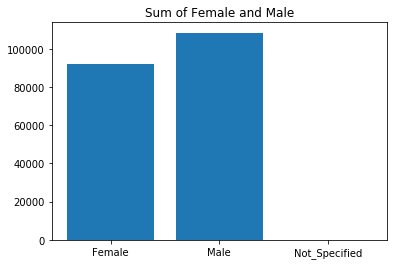

In [181]:
import matplotlib.pyplot as plt
print("The unique values in the gender column:", "\n",patient_df["gender"].unique())
gender_df = patient_df[["gender"]]
gender_dict = {"Female":0, "Male":0, "Not_Specified":0}
for _, row in gender_df.itertuples():
    if row == "Female":
        gender_dict["Female"]+=1
    elif row == "Male":
        gender_dict["Male"]+=1
    else:
        gender_dict["Not_Specified"]+=1
print("The sum of female and male patients:", "\n", gender_dict)
plt.bar(range(len(gender_dict)), list(gender_dict.values()), align="center")
plt.xticks(range(len(gender_dict)), list(gender_dict.keys()))
plt.title("Sum of Female and Male")
plt.show()

The above bar plot visualizes the sum of male and female patients in the dataset. If we ignore the unknown or nan values, there are more male patients than female patients.

Try to visualize the age distribution of the patients in the dataset groupby gender.

float64


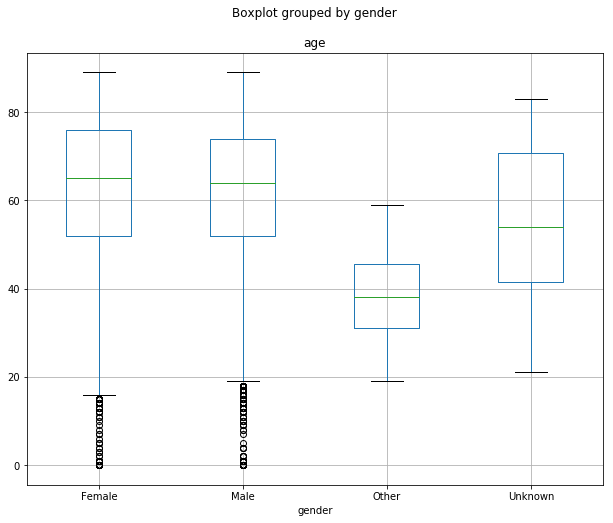

In [186]:
age_df = patient_df[["age"]]
#change the dtypes of age from object to numberic
age_df = age_df["age"].apply(pd.to_numeric, errors='coerce')
print(age_df.dtypes)
#concat gender column and age column
gen_age_df = pd.concat([age_df, gender_df], axis=1)
#print(gen_age_df.head())
#create a boxplot of age group by gender
fig, ax = plt.subplots(figsize=(10,8))
plt.title="Age Distribution Group By Gender"
gen_age_df.boxplot(column=["age"], by="gender", ax=ax)

The above boxplot shows that patients' age are mostly ranged from 52 to 75, while female patients are slightly older than male patient in average. The patients marked as other or unknow in gender are younger.